# Support Vector Machines

## Exercise

- import the support vector machine classifier from scikit-learn (the SVC class) and train a classifier for the examples above using a linear kernel;
- read the documentation to find out how to obtain the support vectors and the associated (dual) weights; use this information to analyze the learnt model: 
    - how many support vectors have been learnt? 
    - are them in the position you would have expected [[1](#note1)]? 
    - is there any margin error?
    - is there any classification error (check it using the classifier predictions)?
- learn a new SVC model using custom C values:
    - how the answers to the questions above change when you use a very high C value (e.g., 1000)?
    - how the answers to the questions above change when you use a very low C value (e.g., 0.3)?
- learn a new SVC model using a rbf kernel:
    - is the new kernel able to capture the linear model?
    - are you surprised by the above answer? Regarless to whether you are surprised or not: why?
    
<a name="note1">[1]</a> If you make two plots one after the other (in the same cell), the plots will be merged into a single one. You may want to use this feature to plot the support vectors on top of the scatter plot for the dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.svm import SVC

## Prepare data

In [2]:
X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

In [3]:
color_pos = mpl.colors.to_rgb('#0989c2')
color_neg = mpl.colors.to_rgb('#dc3f11')
color_map = mpl.colors.ListedColormap(np.array([color_neg,color_pos]), name='binary_classification')
labels =np.array([1 if x + y > 0.3 else -1  for [x,y] in X])

## Explorative Analysis
A simple explorative analysis:
* data distribution 
* class distribution

Text(0.5, 1.0, 'Class Distribution')

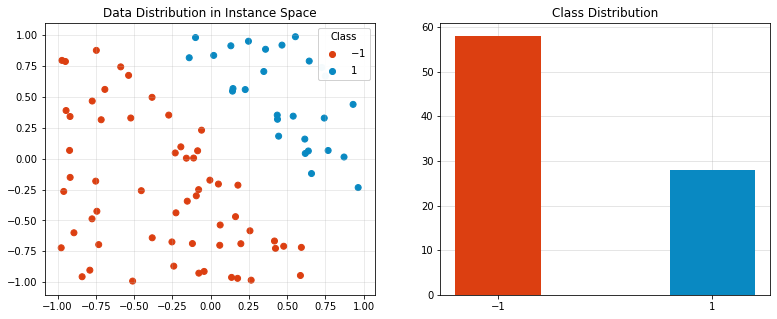

In [4]:
fig, axes = plt.subplots(1,2,figsize=(13,5))

scatter = axes[0].scatter(X[:,0], X[:,1], c=labels, cmap=color_map)
axes[0].grid(True,alpha=0.3)
axes[0].set_title("Data Distribution in Instance Space")
legend = axes[0].legend(*scatter.legend_elements(),
                    loc="upper right", title="Class")
axes[0].add_artist(legend)

count,_ = np.histogram(labels,bins=2)
axes[1].grid(True,alpha=0.4)
axes[1].set_axisbelow(True)
axes[1].bar([-1,1],count, color=[color_neg,color_pos])
axes[1].set_xticks([-1,1])
axes[1].set_title("Class Distribution")


## Exercise #1: SVM classification
We use a *Soft Margin Support Vector Machine* for a classification task, no kernel trick is used this case (linear kernel $\equiv$ no kernel) and the penalty factor $C$ have a default value of $1.0$.
The instance space is suitable for visualization since $\mathcal{X}= \mathbb{R}^2$.

In [5]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X,labels);

### Visualize support vectors
We use `SVC.support_` and `SVC.support_vectors_` attributes to get access to the model' support vectors and visualize them.

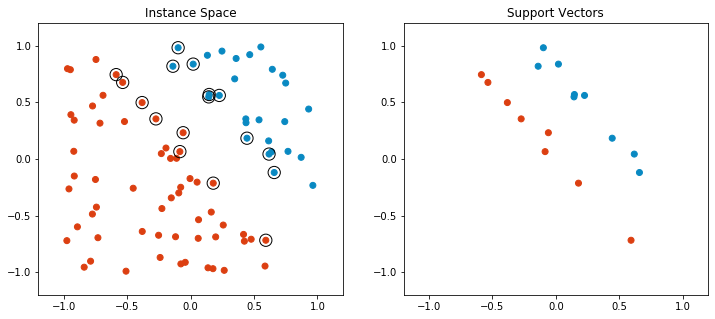

In [6]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

# plot data
axes[0].scatter(X[:,0],X[:,1],marker='o',c=labels,cmap=color_map)

support_vector_labels=labels[svc.support_]
axes[0].scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],
                s=150, facecolors='none', edgecolors='black')

axes[1].scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],
                c=support_vector_labels, cmap=color_map)

# customize appearance
axes[0].set_title('Instance Space')
axes[0].set_xlim(-1.2,1.2)
axes[0].set_ylim(-1.2,1.2)

axes[1].set_xlim(-1.2,1.2)
axes[1].set_ylim(-1.2,1.2)
axes[1].set_title('Support Vectors');

In [7]:
msg = "There are {} support vectors, {} for negative class and {} for positive class"
print(msg.format(np.sum(svc.n_support_), svc.n_support_[0], svc.n_support_[1]))

There are 17 support vectors, 8 for negative class and 9 for positive class


### Visualize Maximum Margin Hyperplanes

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

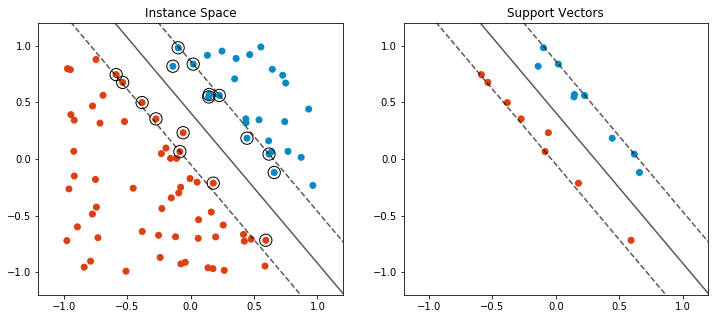

In [8]:

def plot_decision_boundary(ax,svc,levels=[-1,0,1]):
    xx = np.linspace(-5,5,100)
    yy = np.linspace(-5,5,100)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=levels, alpha=0.65, linestyles=['--', '-', '--'])

    
plot_decision_boundary(axes[0],svc)
plot_decision_boundary(axes[1],svc)

fig

From the previous figure is clear that there are margin errors, because some vectors lies inside the margin area. To asses the margin error quantitatively, we compute the decision function with `SVC.decision_function` and then select only those vectors inside the margin, ie the vector with an associated `SVC.decision_function` value in the  range (-1,1)

(-1.2, 1.2)

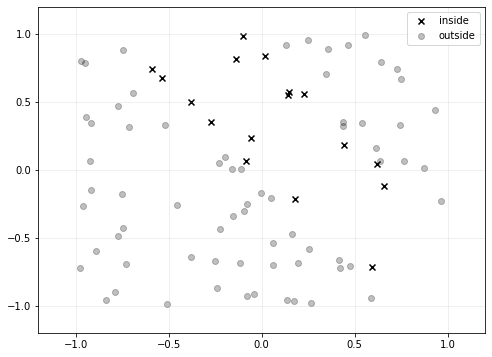

In [9]:
dec = svc.decision_function(X)
inside_margin = np.where((dec > -1) & (dec < 1)) # select vectors INSIDE the margin (under and below the hyperplanes H1 and H2)
outside_margin = np.where(~((dec > -1) & (dec < 1))) # select vectors OUTSIDE the margin

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.scatter(X[inside_margin,0],X[inside_margin,1], marker='x', c='black', label='inside')
ax.scatter(X[outside_margin,0],X[outside_margin,1],marker='o',c='black',alpha=0.25, label='outside')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.25)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)

In [10]:
msg = "There are {} vectors that lies inside the margin"
print(msg.format(len(inside_margin[0])))

There are 17 vectors that lies inside the margin


## Exercise 2: Changing C values
Exploring how cost value $C$ affect the margin size and the number of support vector. From the theory we know that larger value of $C$ allows more tollerance to errors, hence larger margin size.

*Warning: sklearn interpret C as regularization parameter. The strength of the regularization is inversely proportional to C*. **So smaller value allow larger margin.**

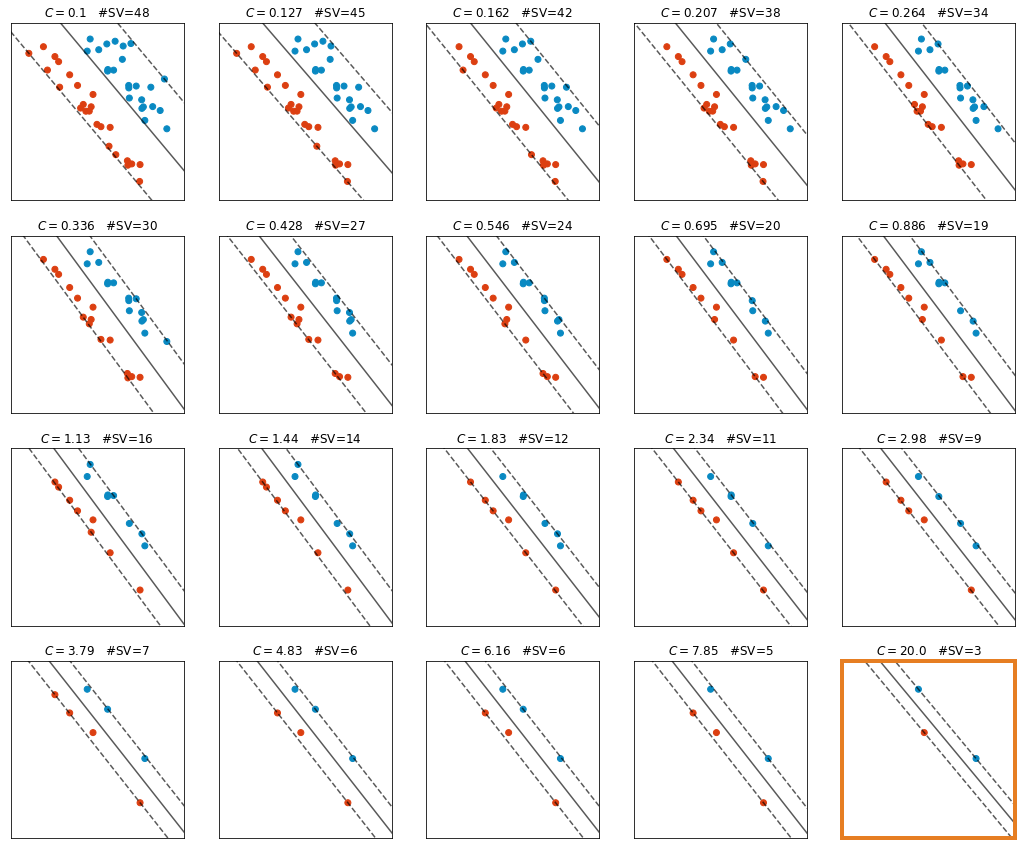

In [11]:
nrows = 4
ncols = 5
penalties = np.geomspace(0.1,10,nrows*ncols)
penalties[-1] *= 2  # force high C value to get an hard margin svm behaviour
sb={'xticks':[],
    'yticks':[],
    'xticklabels':[],
    'yticklabels':[]}
fig, axes = plt.subplots(nrows,ncols,figsize=(18,15),subplot_kw=sb)

svs = [] # collect support vector for different penalty svc
for ax, penalty in zip(axes.ravel(),penalties):
    svc = SVC(kernel='linear', C=penalty)
    svc.fit(X,labels)
    #print("Penalty: {}, support vectors: {}".format(penalty,len(svc.support_vectors_)))
    
    sv_count = np.sum(svc.n_support_)
    svs.append([sv_count,*svc.n_support_])
    support_vector_labels=labels[svc.support_]
    ax.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],
                c=support_vector_labels, cmap=color_map)
    
    plot_decision_boundary(ax,svc)
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_title("$C={:0.3}$   #SV={}".format(penalty,sv_count))  
    
    if ax.is_last_row() and ax.is_last_col():
        plt.setp(ax.spines.values(), color='#e67e22',linewidth=4)

The margin in last plot ($C=20$) is the same of an *Hard Margin SVM*: the closest vectors to the decison boundary identify the margin boundary.

Text(0.5, 1.0, '# of Support Vector as Function of Cost $C$')

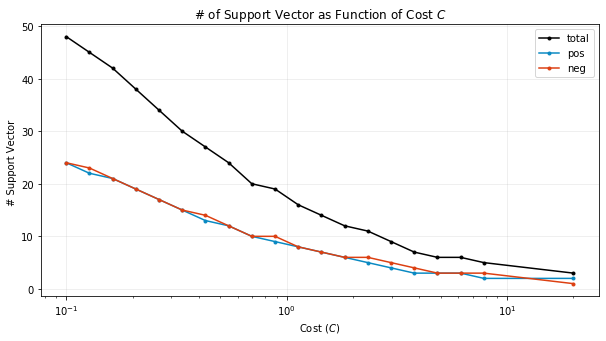

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
svs = np.array(svs)
ax.plot(penalties,svs[:,0],marker='.',label='total',color='black')
ax.plot(penalties,svs[:,2],marker='.',label='pos',color=color_pos)
ax.plot(penalties,svs[:,1],marker='.',label='neg', color=color_neg)

ax.set_xlabel("Cost ($C$)")
ax.set_ylabel("# Support Vector ")
ax.set_xscale('log')
ax.legend(loc='upper right')
ax.grid(True,alpha=0.25)
ax.set_title("# of Support Vector as Function of Cost $C$")

## Exercise 3: SVC with RBF kernel
We train an SVC model on the same previous training data, using an *RBF Kernel*.

In [13]:
svc = SVC(kernel='linear')
svc.fit(X,labels)

svck = SVC(kernel='rbf', gamma=2)
svck.fit(X,labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

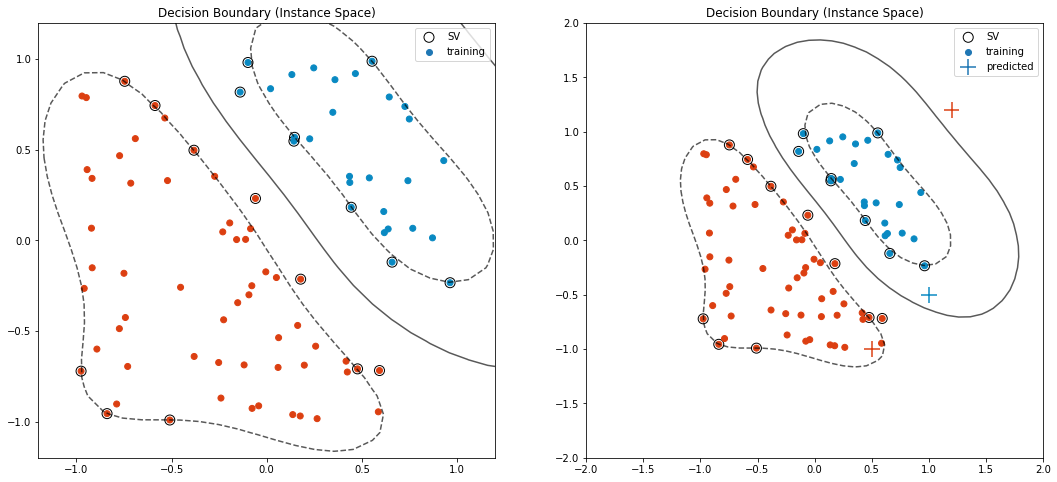

In [14]:
fig,axes = plt.subplots(1,2,figsize=(18,8))

axes[0].scatter(svck.support_vectors_[:,0],svck.support_vectors_[:,1], s=100, facecolor='none',edgecolors='black',label='SV')
axes[0].scatter(X[:,0],X[:,1],c=labels,cmap=color_map,label='training')
plot_decision_boundary(axes[0],svck,levels=[-1,0,1])

axes[0].set_xlim(-1.2,1.2)
axes[0].set_ylim(-1.2,1.2)
axes[0].set_title("Decision Boundary (Instance Space)")
axes[0].legend(loc='upper right')

axes[1].scatter(svck.support_vectors_[:,0],svck.support_vectors_[:,1], s=100, facecolor='none',edgecolors='black',label='SV')
axes[1].scatter(X[:,0],X[:,1],c=labels,cmap=color_map, label='training')
plot_decision_boundary(axes[1],svck,levels=[-1,0,1])

axes[1].set_xlim(-2,2)
axes[1].set_ylim(-2,2)
axes[1].set_title("Decision Boundary (Instance Space)")

# predict new instances
new_inst=np.array([[0.5,-1],
                   [1,-0.5],
                   [1.2,1.2]])

new_labels=svck.predict(new_inst)
axes[1].scatter(new_inst[:,0],new_inst[:,1], c=new_labels, marker='+',cmap=color_map,s=250, label="predicted")
axes[1].legend(loc='upper right')

From the picture above we can see the decision boundary (solid line) and the margin areas. Since we use an *RBF* kernel the decision boundary and margins limit are not defines as hyperplanes. However the model **is able to capture the linear relationships** among data instances.